In [32]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_twitter_handle, add_source

In [18]:
df = pd.read_csv("data/LA_SD_expansion.csv")
df

,player,team,minutes,acquired
0,Ali Riley,LA,1504.0,trade
1,Allyson Swaby,LA,21.0,signed
2,Almuth Schult,LA,90.0,signed
3,Cari Roccaro,LA,1511.0,trade
4,Christen Press,LA,506.0,trade
5,Claire Emslie,LA,783.0,expansion
6,Clarisse Le Bihan,LA,1053.0,signed
7,Dani Weatherholt,LA,1653.0,expansion
8,DiDi Haračić,LA,1710.0,trade
9,Hope Breslin,LA,73.0,draft


In [19]:
df = (
    df.groupby(["team", "acquired"])
    .sum(["minutes"])
    .reset_index()
    .pivot(index="acquired", columns="team", values="minutes")
    .reset_index()
)
df

team,acquired,LA,SD
0,draft,620.0,3028.0
1,expansion,4458.0,3265.0
2,signed,5153.0,1658.0
3,trade,9558.0,11806.0


<Figure size 864x720 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

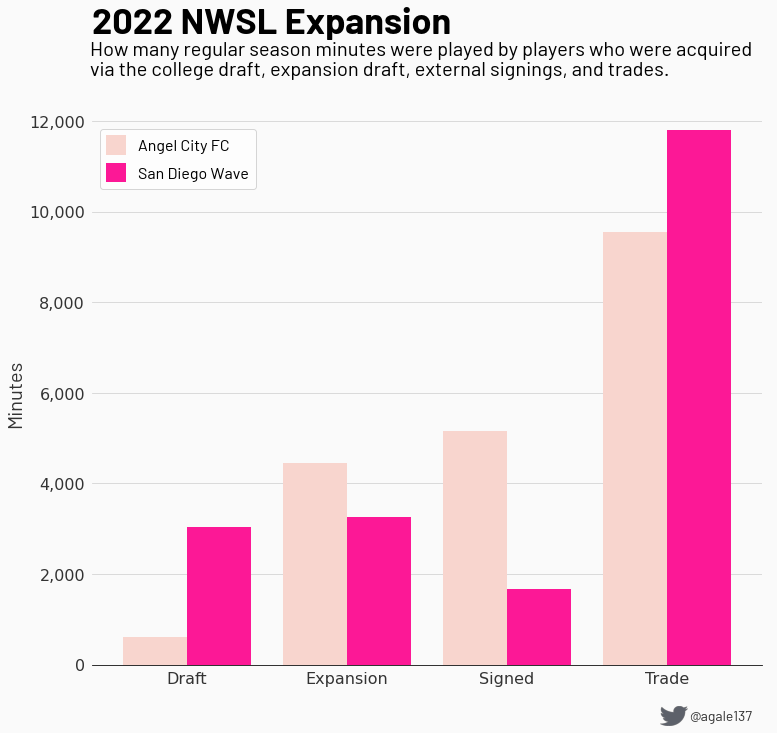

In [35]:
plt.clf()
plt.rcParams["figure.figsize"] = (12, 10)
plt.figure(dpi=200, facecolor=Colors.WHITE)
fig, ax = plt.subplots()
fig.patch.set_facecolor(Colors.WHITE)
ax.set_facecolor(Colors.WHITE)

bars = []
bars.append(plt.bar(df.index - 0.2, df["LA"], 0.4, color=NWSL.color("LA")))
bars.append(plt.bar(df.index + 0.2, df["SD"], 0.4, color = NWSL.color("SD")))

# Axes and ticks
ax.spines[["top", "left", "right"]].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color=Colors.LIGHT_GRAY)
ax.tick_params(axis="both", which="major", labelsize=16, labelcolor=Colors.BLACK)
ax.tick_params(bottom=False, left=False)
ax.set_ylim([0, 12000])
ax.set_xticks(df.index)
ax.set_xticklabels(map(lambda x: x.capitalize(), df["acquired"]))
ax.set_ylabel("Minutes", fontproperties=Fonts.BARLOW,
    size=20, color=Colors.BLACK)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fp = Fonts.BARLOW
fp.set_size(16)
plt.rcParams["legend.handlelength"] = 1.2
plt.rcParams["legend.handleheight"] = 1.5
plt.legend(bars, ["Angel City FC", "San Diego Wave"], loc="upper left", prop=fp)

# Title
ax.set_title(
    "2022 NWSL Expansion",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.15,
)

# Subtitle
ax.text(
    -0.6,
    13000,
    "How many regular season minutes were played by players who were acquired\nvia the college draft, expansion draft, external signings, and trades.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

# Twitter logo and username
add_twitter_handle(fig, x=0.78, y=0.04, fs=14, w=0.03)

# Save image
plt.savefig(
    "past_expansion.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)